Example 5.9.10
=========
A Tapered Shaft. Consider a tapered shaft of length 1.5 m and
a diameter that changes linearly from 25 to 40 mm. A disk of diameter 250 mm
and thickness 40 mm is placed at the center of the shaft, and short bearings
of stiffness 10 MN/m and damping 1 kNs/m are attached at the ends of the
shaft. The Young’s modulus and mass density are 211 GN/mz and 7,810 kg/m3,
respectively. Estimate the first pair of natural frequencies of this machine at
3,000 rev/min using a stepped shaft diameter and elements of uniform diameter
and by using tapered elements.

In [24]:
import ross as rs
import numpy as np
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

To check the rotor geometry, use the method plot_rotor()
To calculate the rotor state, use the method run()


bokeh.plotting.figure.Figure(
    id='f4f94f50-ef0f-4e10-85df-a5052b1100e6',
    above=[],
    aspect_scale=1,
    background_fill_alpha={'value': 1.0},
    background_fill_color={'value': '#ffffff'},
    below=[bokeh.models.axes.LinearAxis(
         id='f7c0a06a-9806-41f0-b596-140fdceb49d1',
         axis_label='Axial location (m)',
         axis_label_standoff=5,
         axis_label_text_align='left',
         axis_label_text_alpha={'value': 1.0},
         axis_label_text_baseline='bottom',
         axis_label_text_color={'value': '#444444'},
         axis_label_text_font='helvetica',
         axis_label_text_font_size={'value': '10pt'},
         axis_label_text_font_style='italic',
         axis_label_text_line_height=1.2,
         axis_line_alpha={'value': 1.0},
         axis_line_cap='butt',
         axis_line_color={'value': 'black'},
         axis_line_dash=[],
         axis_line_dash_offset=0,
         axis_line_join='bevel',
         axis_line_width={'value': 1},
         bounds='auto',
         fixed_location=None,
         formatter=bokeh.models.formatters.BasicTickFormatter(
             id='e1f0cbac-95c4-43ba-a097-66a96a00f67e',
             js_event_callbacks={},
             js_property_callbacks={},
             name=None,
             power_limit_high=5,
             power_limit_low=-3,
             precision='auto',
             subscribed_events=[],
             tags=[],
             use_scientific=True),
         js_event_callbacks={},
         js_property_callbacks={},
         level='overlay',
         major_label_orientation='horizontal',
         major_label_overrides={},
         major_label_standoff=5,
         major_label_text_align='center',
         major_label_text_alpha={'value': 1.0},
         major_label_text_baseline='alphabetic',
         major_label_text_color={'value': '#444444'},
         major_label_text_font='helvetica',
         major_label_text_font_size={'value': '8pt'},
         major_label_text_font_style='normal',
         major_label_text_line_height=1.2,
         major_tick_in=2,
         major_tick_line_alpha={'value': 1.0},
         major_tick_line_cap='butt',
         major_tick_line_color={'value': 'black'},
         major_tick_line_dash=[],
         major_tick_line_dash_offset=0,
         major_tick_line_join='bevel',
         major_tick_line_width={'value': 1},
         major_tick_out=6,
         minor_tick_in=0,
         minor_tick_line_alpha={'value': 1.0},
         minor_tick_line_cap='butt',
         minor_tick_line_color={'value': 'black'},
         minor_tick_line_dash=[],
         minor_tick_line_dash_offset=0,
         minor_tick_line_join='bevel',
         minor_tick_line_width={'value': 1},
         minor_tick_out=4,
         name=None,
         plot=bokeh.plotting.figure.Figure(id='f4f94f50-ef0f-4e10-85df-a5052b1100e6', ...),
         subscribed_events=[],
         tags=[],
         ticker=bokeh.models.tickers.BasicTicker(
             id='5be187b8-7ed6-4a04-9ae6-929a614eb4b7',
             base=10.0,
             desired_num_ticks=6,
             js_event_callbacks={},
             js_property_callbacks={},
             mantissas=[1, 2, 5],
             max_interval=None,
             min_interval=0.0,
             name=None,
             num_minor_ticks=5,
             subscribed_events=[],
             tags=[]),
         visible=True,
         x_range_name='default',
         y_range_name='default')],
    border_fill_alpha={'value': 1.0},
    border_fill_color={'value': '#ffffff'},
    css_classes=[],
    disabled=False,
    extra_x_ranges={},
    extra_y_ranges={},
    h_symmetry=True,
    height=None,
    hidpi=True,
    js_event_callbacks={},
    js_property_callbacks={},
    left=[bokeh.models.axes.LinearAxis(
         id='28558fea-3ded-41e2-8ce3-6e1df3f6e3f5',
         axis_label='Shaft radius (m)',
         axis_label_standoff=5,
         axis_label_text_align='left',
         axis_label_text_alpha={'value': 1.0},
         axis_label_text_baseline='botto

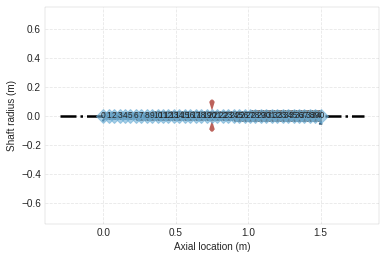

In [34]:
shaft_elements =[]
disk_elements = []
bearing_seal_elements = []
n_el = 40

bearing_seal_elements.append(rs.BearingElement(n=0,kxx=10e6,kyy=10e6,cxx=1e3,cyy=1e3))
bearing_seal_elements.append(rs.BearingElement(n=n_el,kxx=10e6,kyy=10e6,cxx=1e3,cyy=1e3))

for i in range(n_el):
    shaft_elements.append(rs.ShaftElement(L=1.5 / n_el, material='Steel', n=i, i_d=0, o_d=0.025 + 0.015 * (i / n_el)))
        
disk_elements.append(rs.DiskElement.from_geometry(n=(n_el / 2), material='Steel', width=0.07, i_d=0.0325, o_d=0.28))

tapered_shaft_rotor = rs.Rotor(shaft_elements=shaft_elements,
                          bearing_seal_elements=bearing_seal_elements,
                          disk_elements=disk_elements)

tapered_shaft_rotor.plot_rotor()

In [35]:
tapered_shaft_rotor.w = 3000* np.pi /30
tapered_shaft_rotor.run()
print(tapered_shaft_rotor.wn/(2*np.pi))

[ 10.00352279  10.04947251  63.66216661 108.12100831 177.09316305
 179.11154552]
